<a href="https://colab.research.google.com/github/ricky-kiva/ReNat-SGride-1/blob/main/2_l2_augmentation_horse_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Augmentation (on Horses vs Human)

Download dataset

In [11]:
# training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-09-20 18:09:49--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.119.207, 108.177.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  41.8MB/s    in 4.0s    

2023-09-20 18:09:53 (35.3 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2023-09-20 18:09:53--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.119.207, 108.177.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

Unzip dataset

In [12]:
import os
import zipfile

# unzip train set
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')

# unzip validation set
zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

Referencing data directories

In [13]:
# train dir
train_horse_dir = os.path.join('tmp/horse-or-human/horses')
train_human_dir = os.path.join('tmp/horse-or-human/humans')

# validation dir
validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

Create model

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile the model

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

Create ImageDataGenerator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    'tmp/horse-or-human',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    'tmp/validation-horse-or-human',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Train the model

In [17]:
EPOCHS = 20

history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8)

Epoch 1/20
8/8 [==============================] - 31s 4s/step - loss: 0.6940 - accuracy: 0.5261 - val_loss: 0.6840 - val_accuracy: 0.5039
Epoch 2/20
8/8 [==============================] - 28s 4s/step - loss: 0.6879 - accuracy: 0.5395 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 27s 3s/step - loss: 0.6710 - accuracy: 0.5695 - val_loss: 0.6626 - val_accuracy: 0.5898
Epoch 4/20
8/8 [==============================] - 29s 4s/step - loss: 0.6480 - accuracy: 0.6670 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 29s 4s/step - loss: 0.6524 - accuracy: 0.6674 - val_loss: 0.6683 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 27s 3s/step - loss: 0.6095 - accuracy: 0.7086 - val_loss: 1.2319 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 28s 4s/step - loss: 0.5952 - accuracy: 0.6897 - val_loss: 0.7114 - val_accuracy: 0.5000
Epoch 8/20
8/8 [==================

Plot the model history

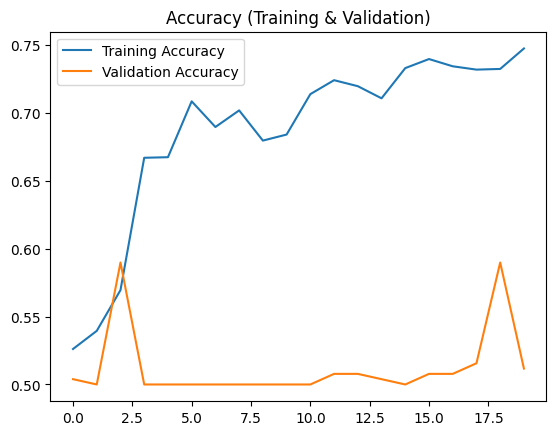

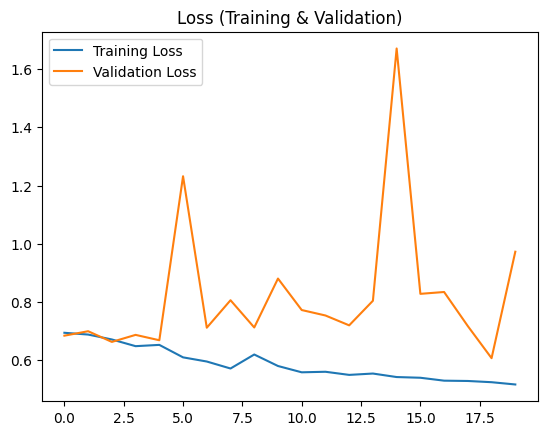

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy (Training & Validation)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss (Training & Validation)')
plt.legend()

**Result:** The preprocessing used in augmenting the data did not help much in result. This might be because the additional training data generator still do not represent the features in the validation data